# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL
url="http://api.openweathermap.org/data/2.5/weather?"
# city=""
query_url=url+"appid="+weather_api_key+"&units=imperial"+"&q=" #+city

cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
maxtemp = []
windspeed = []
index = 0
seti = 1
print("Data Retrieval")
print("-"*30)

for i, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityname.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        if index > 49:
            index = 0
            seti = seti + 1
    
        else:
            index = index + 1
            
        print(f"Processing Record {index} of Set {seti} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Data Retrieval
------------------------------
Processing Record 1 of Set 1 : vaini
Processing Record 2 of Set 1 : pontes e lacerda
Processing Record 3 of Set 1 : leningradskiy
Processing Record 4 of Set 1 : sao filipe
City not found. Skipping...
Processing Record 5 of Set 1 : montego bay
Processing Record 6 of Set 1 : tasiilaq
Processing Record 7 of Set 1 : albany
Processing Record 8 of Set 1 : nouadhibou
Processing Record 9 of Set 1 : sitka
Processing Record 10 of Set 1 : umtata
Processing Record 11 of Set 1 : meulaboh
Processing Record 12 of Set 1 : castro
Processing Record 13 of Set 1 : ushuaia
Processing Record 14 of Set 1 : avarua
Processing Record 15 of Set 1 : punta arenas
Processing Record 16 of Set 1 : ambilobe
Processing Record 17 of Set 1 : saldanha
Processing Record 18 of Set 1 : katsuura
Processing Record 19 of Set 1 : ponta delgada
Processing Record 20 of Set 1 : hofn
Processing Record 21 of Set 1 : paternion
Processing Record 22 of Set 1 : kavieng
Processing Record 23 of

Processing Record 34 of Set 4 : san patricio
Processing Record 35 of Set 4 : georgiyevka
Processing Record 36 of Set 4 : bathsheba
Processing Record 37 of Set 4 : yigou
Processing Record 38 of Set 4 : aklavik
Processing Record 39 of Set 4 : paita
City not found. Skipping...
Processing Record 40 of Set 4 : isangel
Processing Record 41 of Set 4 : estelle
Processing Record 42 of Set 4 : alakurtti
Processing Record 43 of Set 4 : srivardhan
Processing Record 44 of Set 4 : doha
Processing Record 45 of Set 4 : izhma
Processing Record 46 of Set 4 : alihe
Processing Record 47 of Set 4 : margherita
Processing Record 48 of Set 4 : kumertau
Processing Record 49 of Set 4 : ngama
Processing Record 50 of Set 4 : emborion
City not found. Skipping...
Processing Record 0 of Set 5 : kashiwazaki
Processing Record 1 of Set 5 : port moresby
Processing Record 2 of Set 5 : gornopravdinsk
Processing Record 3 of Set 5 : takoradi
Processing Record 4 of Set 5 : napoleon
Processing Record 5 of Set 5 : guozhen
Proc

Processing Record 20 of Set 8 : kharp
Processing Record 21 of Set 8 : altagracia de orituco
Processing Record 22 of Set 8 : andenes
Processing Record 23 of Set 8 : andros town
Processing Record 24 of Set 8 : kutum
Processing Record 25 of Set 8 : iskateley
Processing Record 26 of Set 8 : wewak
Processing Record 27 of Set 8 : lanzhou
Processing Record 28 of Set 8 : porvoo
Processing Record 29 of Set 8 : acaponeta
Processing Record 30 of Set 8 : saint george
Processing Record 31 of Set 8 : bambous virieux
Processing Record 32 of Set 8 : vilhena
Processing Record 33 of Set 8 : carnarvon
Processing Record 34 of Set 8 : nieuw amsterdam
Processing Record 35 of Set 8 : carlisle
Processing Record 36 of Set 8 : buchanan
Processing Record 37 of Set 8 : lagoa
Processing Record 38 of Set 8 : seoul
Processing Record 39 of Set 8 : roma
Processing Record 40 of Set 8 : teknaf
Processing Record 41 of Set 8 : maua
Processing Record 42 of Set 8 : kaitangata
City not found. Skipping...
Processing Record 43

Processing Record 0 of Set 12 : talaja
Processing Record 1 of Set 12 : bubaque
Processing Record 2 of Set 12 : chegutu
Processing Record 3 of Set 12 : road town
Processing Record 4 of Set 12 : dembi dolo
Processing Record 5 of Set 12 : ketchikan
Processing Record 6 of Set 12 : waldoboro
Processing Record 7 of Set 12 : jos
Processing Record 8 of Set 12 : svetlaya
Processing Record 9 of Set 12 : pedernales
Processing Record 10 of Set 12 : ourossogui
Processing Record 11 of Set 12 : mungaa
Processing Record 12 of Set 12 : severnyy
Processing Record 13 of Set 12 : hollabrunn
Processing Record 14 of Set 12 : zhuhai
Processing Record 15 of Set 12 : mount isa
Processing Record 16 of Set 12 : ixtapa
Processing Record 17 of Set 12 : kununurra
City not found. Skipping...
City not found. Skipping...
Processing Record 18 of Set 12 : inhambane
Processing Record 19 of Set 12 : ossora
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Make a dictionary
cleandata = pd.DataFrame({ 
                "City" : cityname,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : maxtemp,
                "Wind Speed" : windspeed
})

In [6]:
#convert dictionary to dataframe and check for NAN

cleandata=pd.DataFrame(cleandata)
cleandata.count()

City          580
Cloudiness    580
Country       580
Date          580
Humidity      580
Lat           580
Lng           580
Max Temp      580
Wind Speed    580
dtype: int64

In [7]:
cleandata

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Vaini,40,TO,1598756562,78,-21.20,-175.20,80.60,10.29
1,Pontes e Lacerda,59,BR,1598756575,32,-15.23,-59.34,83.10,2.39
2,Leningradskiy,100,RU,1598756575,87,69.38,178.42,37.20,11.34
3,São Filipe,76,CV,1598756575,84,14.90,-24.50,78.76,8.90
4,Montego Bay,20,JM,1598756575,79,18.47,-77.92,84.20,3.36
...,...,...,...,...,...,...,...,...,...
575,Mount Isa,12,AU,1598756534,32,-20.73,139.50,84.20,9.17
576,Ixtapa,90,MX,1598756564,74,20.70,-105.20,84.20,1.36
577,Kununurra,24,AU,1598756631,26,-15.77,128.73,89.60,12.75
578,Inhambane,18,MZ,1598756631,87,-23.86,35.38,71.38,4.00


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

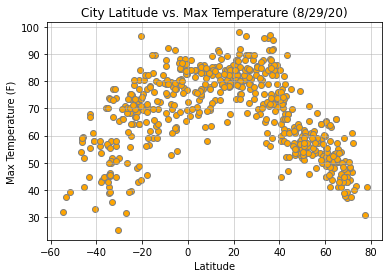

In [8]:
#create plot for lattitude vs temperature

plt.scatter(cleandata["Lat"], cleandata["Max Temp"], color = "orange", edgecolor = "grey")

# title
plt.title("City Latitude vs. Max Temperature (8/29/20)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

# Latitude vs. Humidity Plot

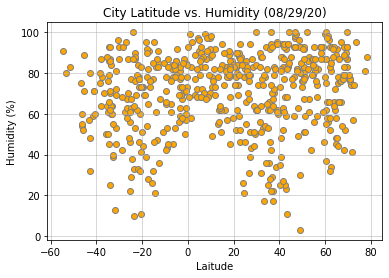

In [9]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(cleandata["Lat"],cleandata["Humidity"], color = "orange", edgecolor = "grey")

# Set title
plt.title("City Latitude vs. Humidity (08/29/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

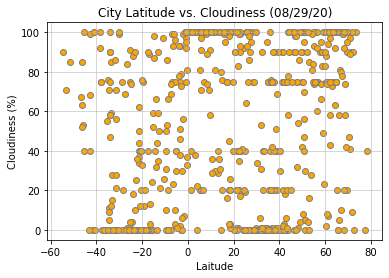

In [10]:
plt.scatter(cleandata["Lat"],cleandata["Cloudiness"],edgecolors="grey",facecolors="orange")

# Set title
plt.title("City Latitude vs. Cloudiness (08/29/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")


## Latitude vs. Wind Speed Plot

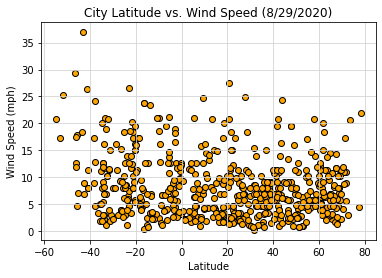

In [11]:
plt.scatter(cleandata["Lat"],cleandata["Wind Speed"],edgecolors="black",facecolors="orange")
plt.title("City Latitude vs. Wind Speed (8/29/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northernhemisphere = cleandata.loc[cleandata["Lat"] >= 0]
southernhemisphere = cleandata.loc[cleandata["Lat"] < 0]
northernhemisphere = pd.DataFrame(northernhemisphere)
southernhemisphere = pd.DataFrame(southernhemisphere)


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"r-squared  = {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color ="orange")
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="lightblue")

r-squared  = -0.79


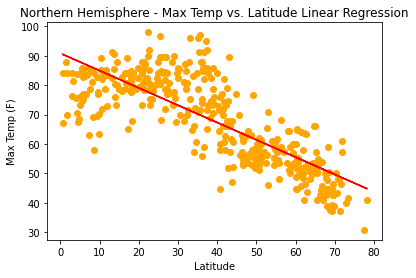

In [30]:
equation = linear_agression(northernhemisphere["Lat"], northernhemisphere["Max Temp"])

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared  = 0.65


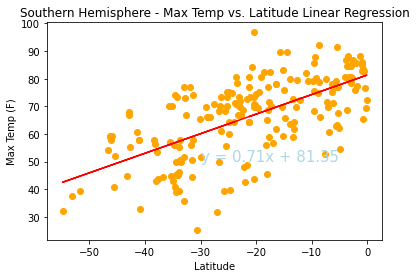

In [31]:
# Call an function #1
equation = linear_agression(southernhemisphere["Lat"],southernhemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared  = -0.01


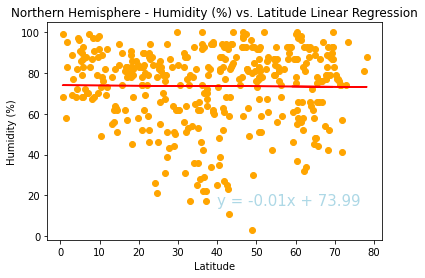

In [32]:
# Call an function #1
equation = linear_agression(northernhemisphere["Lat"], northernhemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared  = 0.08


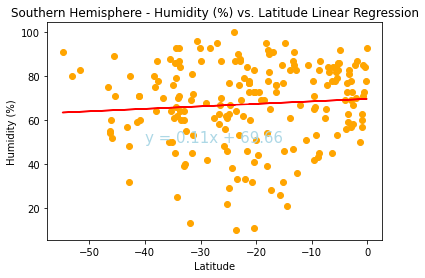

In [33]:

# Call an function #1
equation = linear_agression(southernhemisphere["Lat"], southernhemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared  = 0.06


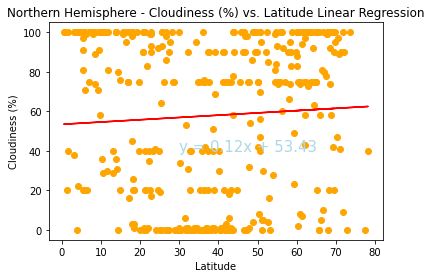

In [34]:
# Call an function #1
equation = linear_agression(northernhemisphere["Lat"], northernhemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared  = 0.03


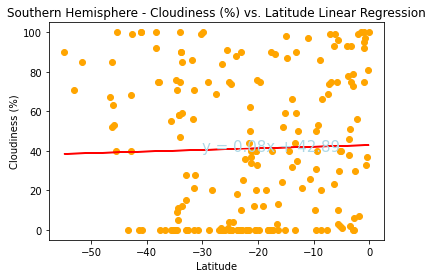

In [35]:
# Call an function #1
equation = linear_agression(southernhemisphere["Lat"], southernhemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared  = 0.05


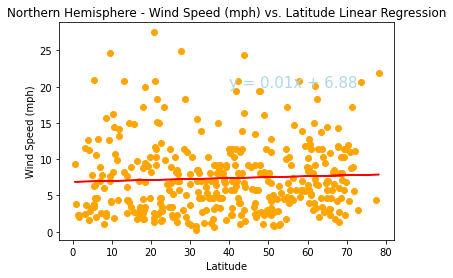

In [36]:
# Call an function #1
equation = linear_agression(northernhemisphere["Lat"], northernhemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared  = -0.22


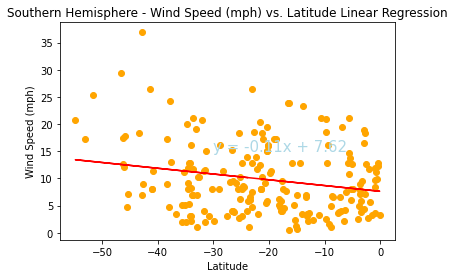

In [37]:

# Call an function #1
equation = linear_agression(southernhemisphere["Lat"], southernhemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")